In [1]:
import numpy as np
from keras.datasets import fashion_mnist

In [2]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print("number of samples in training set:"+ str(len(x_train)))
print("number of labels in training set:"+ str(len(y_train)))
print("dimention of single image in xtrain:"+str(x_train[0].shape))

print("number of samples in test set:"+ str(len(x_test)))
print("number of labels in test set:"+ str(len(x_test)))
print("dimention of single image in xtest:"+str(x_test[0].shape))





number of samples in training set:60000
number of labels in training set:60000
dimention of single image in xtrain:(28, 28)
number of samples in test set:10000
number of labels in test set:10000
dimention of single image in xtest:(28, 28)


##view sample images

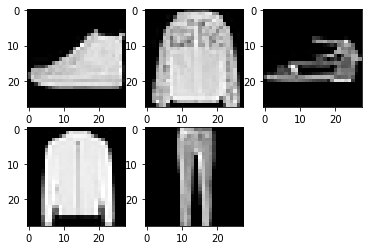

In [4]:
import matplotlib.pyplot as plt

plt.subplot(231)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(232)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(233)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(234)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(235)
random_num=np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

In [5]:
from keras.utils import np_utils     # np_utila  --convert array of lebeled data to one hot encoded vector
import keras                         
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from keras import backend as k

import tensorflow as tf

 #setting a training parameters
batch_size=128
epochs=100

#stroring the number of rows and columns
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]

x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)   # img=greyscale --1 or img=colored img --3(RGB)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)       #reshaping the array into [60000,28,28,1]

#storing shape of single img
input_shape=(img_rows,img_cols,1)

#changing img type to float
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

#normalizing a data by pixel range from (0 to 255) to (0 to 1)
x_train/=255
x_test/=255

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

#calculate the classes and number of classes and pixels
num_classes=y_test.shape[1]
num_pixels=x_train.shape[1] *x_train.shape[2]

#create a CNN model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),
                 activation='relu',input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64,kernel_size=(3,3),
                 activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

##train a model

In [6]:
model_fitting=model.fit(x_train,y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print("test loss:",score[0])
print("test accuracy:",score[1])


Epoch 1/100
469/469 [==============================] - 18s 20ms/step - loss: 2.5062 - accuracy: 0.2776 - val_loss: 1.4505 - val_accuracy: 0.5171
Epoch 2/100
469/469 [==============================] - 9s 19ms/step - loss: 1.5081 - accuracy: 0.5175 - val_loss: 0.8322 - val_accuracy: 0.7166
Epoch 3/100
469/469 [==============================] - 9s 19ms/step - loss: 1.1946 - accuracy: 0.6141 - val_loss: 0.7265 - val_accuracy: 0.7470
Epoch 4/100
469/469 [==============================] - 9s 19ms/step - loss: 1.0511 - accuracy: 0.6569 - val_loss: 0.6684 - val_accuracy: 0.7633
Epoch 5/100
469/469 [==============================] - 9s 19ms/step - loss: 0.9628 - accuracy: 0.6858 - val_loss: 0.6283 - val_accuracy: 0.7760
Epoch 6/100
469/469 [==============================] - 9s 19ms/step - loss: 0.8968 - accuracy: 0.7054 - val_loss: 0.5986 - val_accuracy: 0.7872
Epoch 7/100
469/469 [==============================] - 9s 19ms/step - loss: 0.8492 - accuracy: 0.7198 - val_loss: 0.5759 - val_accuracy

In [ ]:
# Configuration related preprocessing step before mounting the drive
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
os.chdir("/content/drive/My Drive/Clothing project")

In [9]:
model.save('clothing_classification_model_1.h5')

In [10]:
# Import few more necessary libraries.
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Function to load and prepare the image in right shape
def load_image(filename):
	# Load the image
	img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
	# Convert the image to array
	img = img_to_array(img)
	# Reshape the image into a sample of 1 channel
	img = img.reshape(1, 28, 28, 1)
	# Prepare it as pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

# Load an image and predict the apparel class
img = load_image('sandal.jpg')
# Load the saved model
model = load_model('clothing_classification_model_1.h5')
# Predict the apparel class
class_prediction = np.argmax(model.predict(img), axis=-1)
print(class_prediction[0])

#Map apparel category with the numerical class
if class_prediction[0] == 0:
  product = "T-shirt/top"
elif class_prediction[0] == 1:
  product = "Trouser"
elif class_prediction[0] == 2:
  product = "Pullover"
elif class_prediction[0] == 3:
  product = "Dress"
elif class_prediction[0] == 4:
  product = "Coat"
elif class_prediction[0] == 5:
  product = "Bag"
elif class_prediction[0] == 6:
  product = "Shirt"
elif class_prediction[0] == 7:
  product = "Sneaker"
elif class_prediction[0] == 8:
  product = "Sandal"
else:
  product = "Ankle boot"

print(product)

8
Sandal
